<a href="https://colab.research.google.com/github/SachinGupta2012/Assignment-1/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This Small Project anayslis the Performance of Students in Three Subjects--
#1.Math Score
#2.Reading Score
#3.Writing Score

The given code snippet is setting up the environment for data analysis and visualization using Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

This module is used for interacting with files in Colab, like uploading or downloading files.

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sachin099","key":"f6bd9b7688a5358dcddbe233aa83f959"}'}

This code sets up Kaggle API authentication in Google Colab by creating a directory for the Kaggle configuration, moving the Kaggle JSON authentication file to that directory, ensuring appropriate permissions, and installing the Kaggle Python package.

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!mv /content/kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

Downloading the datasets, and unziping it.

In [ ]:
!kaggle datasets download -d rkiattisak/student-performance-in-mathematics

Dataset URL: https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics
License(s): other
  0% 0.00/8.66k [00:00<?, ?B/s]
100% 8.66k/8.66k [00:00<00:00, 19.1MB/s]


In [ ]:
!unzip /content/student-performance-in-mathematics.zip

Archive:  /content/student-performance-in-mathematics.zip
  inflating: exams.csv               


This code reads a CSV file named "exams.csv" located at "/content/" into a Pandas DataFrame named "data".

In [ ]:
data=pd.read_csv("/content/exams.csv")

In [ ]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


This command displays the first few rows of the DataFrame named "data".


In [ ]:
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


Displays the first few rows of the DataFrame.

In [ ]:
data.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Displays the dimensions (number of rows and columns) of the DataFrame.

In [ ]:
data.shape

(1000, 8)

Calculates and Displays the sum of missing values (NaN) in each column of the DataFrame

In [ ]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,67.810,15.250196,15.0,58.0,68.0,79.25,100.0
reading score,1000.0,70.382,14.107413,25.0,61.0,70.5,80.00,100.0
writing score,1000.0,69.140,15.025917,15.0,59.0,70.0,80.00,100.0


'**missingno**' is a Python library used for visualizing missing data within a dataset. It provides a straightforward way to understand the distribution and patterns of missing values, which can be critical for data cleaning and preprocessing steps in data analysis and machine learning workflows.

In [ ]:
!pip install missingno

In [ ]:
import missingno as msg

<Axes: >

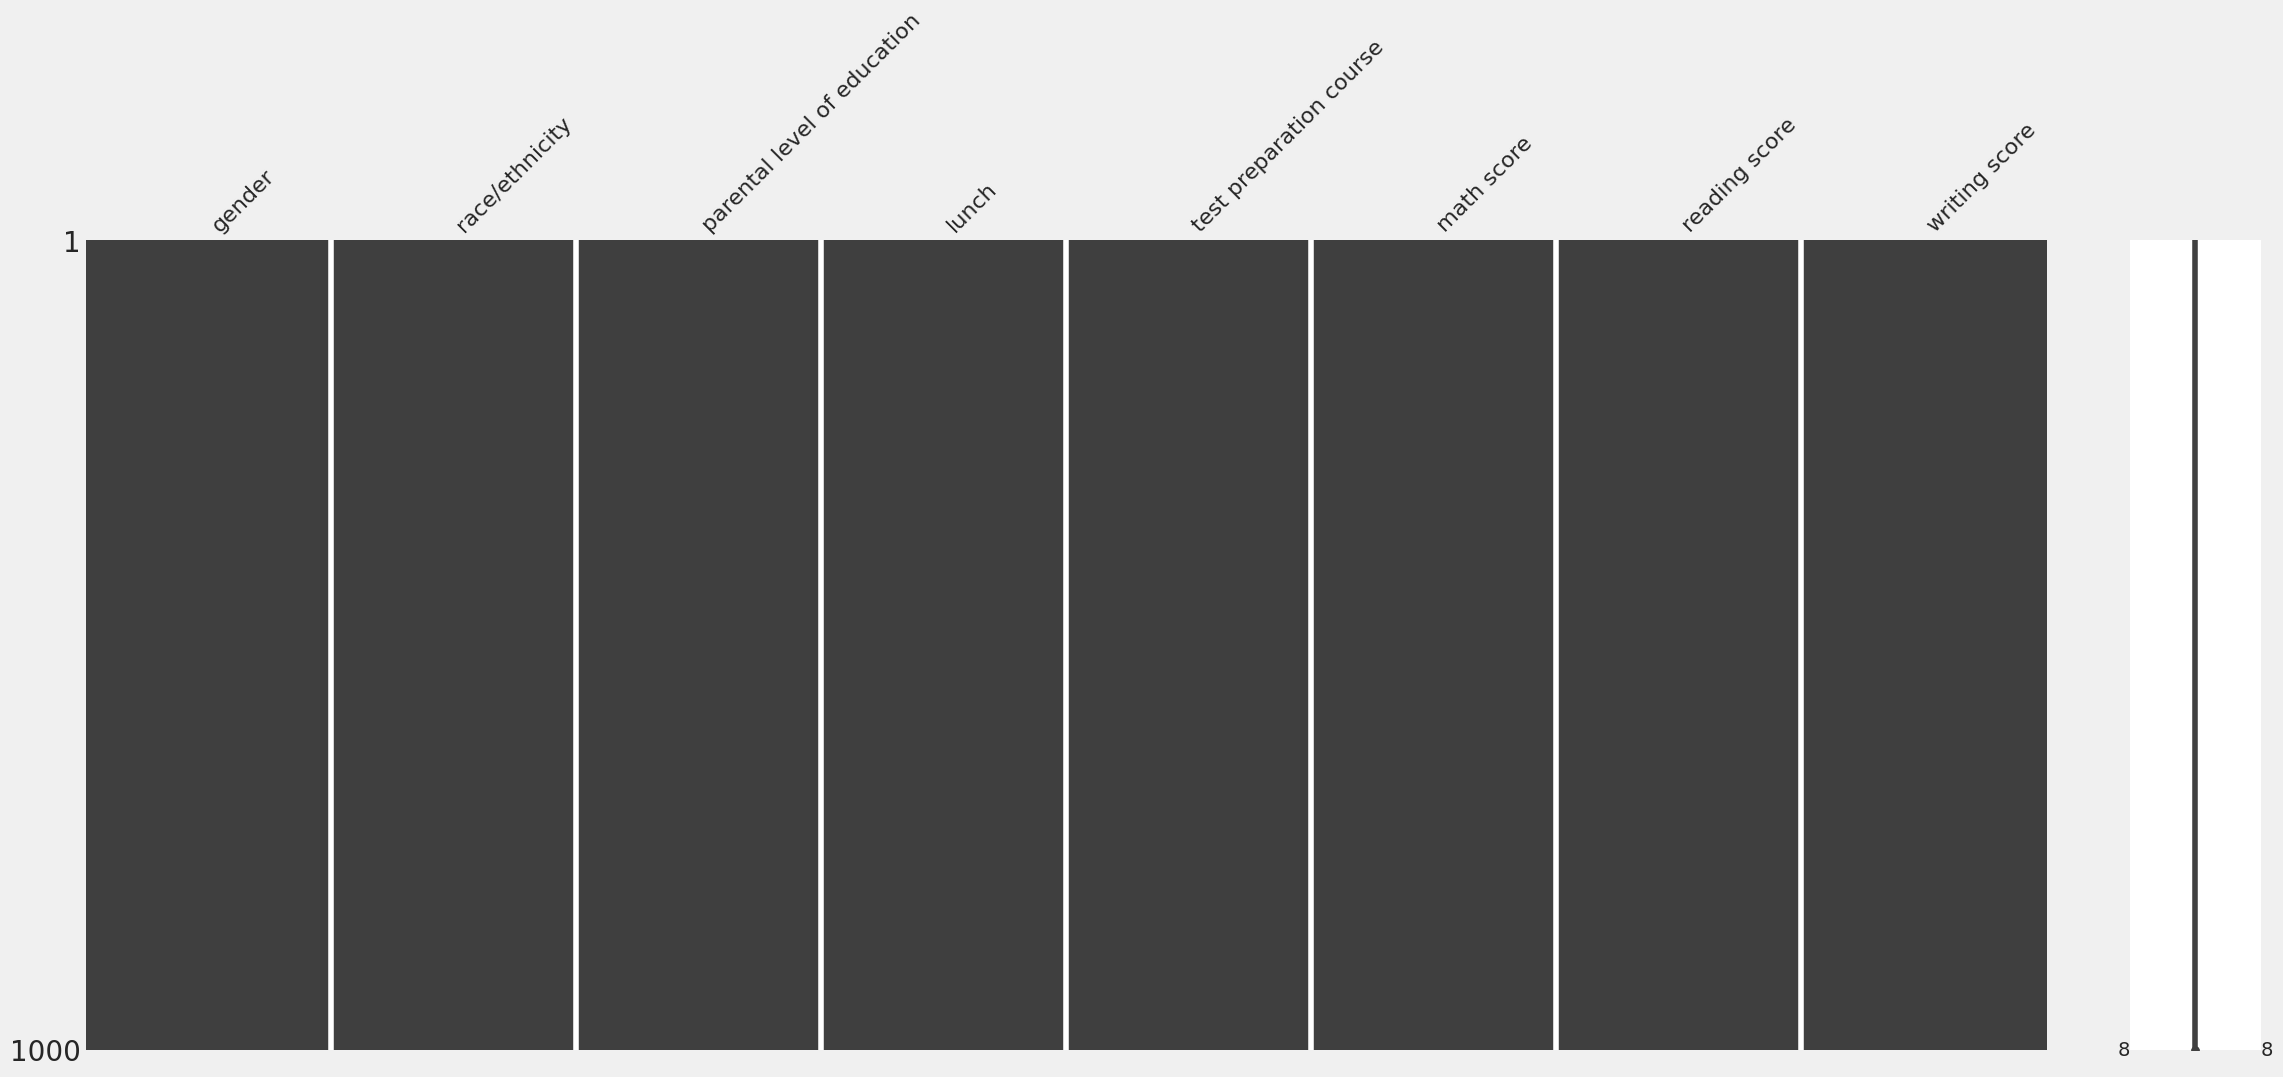

In [ ]:
msg.matrix(data)

The code creates a bar chart to visualize the distribution of genders in a dataset, displaying counts and percentages on top of the bars. Enhancements include custom colors, labels, a bold title, grid lines

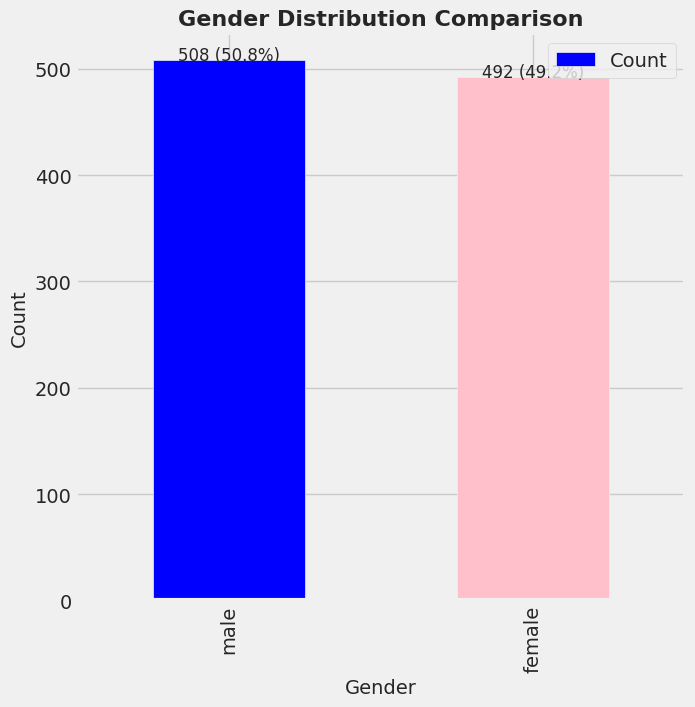

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

# Plotting the bar chart
value_counts = data['gender'].value_counts(dropna=True)
value_counts.plot.bar(color=['blue', 'pink'], ax=ax)

plt.title('Gender Distribution Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

for i, count in enumerate(value_counts):
    percent = f'{count / value_counts.sum() * 100:.1f}%'
    ax.text(i, count + 0.05, f'{count} ({percent})', ha='center', fontsize=12)
ax.yaxis.grid(True)
ax.legend(['Count'], loc='upper right')
plt.show()

In [ ]:
data['race/ethnicity'].value_counts()

race/ethnicity
group C    323
group D    257
group B    198
group E    143
group A     79
Name: count, dtype: int64

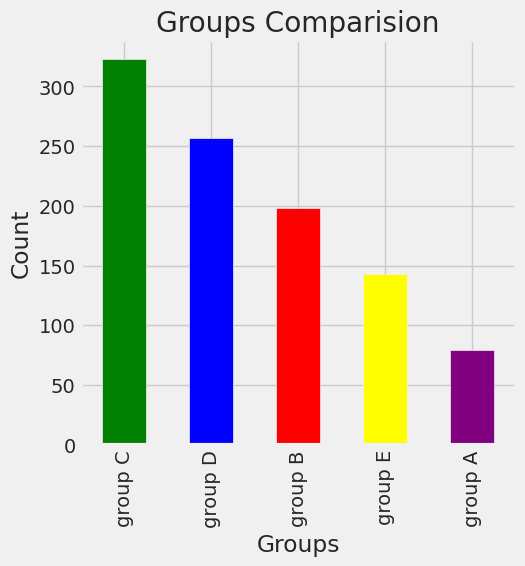

In [ ]:
plt.subplots(figsize=(5,5))
data['race/ethnicity'].value_counts(normalize=True)
data['race/ethnicity'].value_counts(dropna= False).plot.bar(color=['green','blue','red','yellow','purple'])
plt.title('Groups Comparision')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.show()

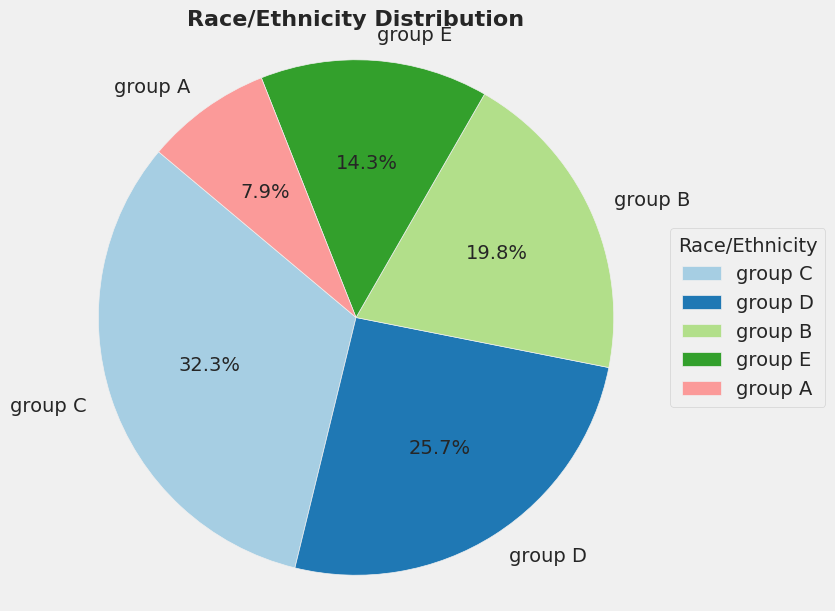

In [ ]:
race_counts = data['race/ethnicity'].value_counts()
fig, ax = plt.subplots(figsize=(7, 7))
race_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, ax=ax)
plt.title('Race/Ethnicity Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('')
ax.axis('equal')
ax.legend(race_counts.index, title='Race/Ethnicity', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#So we can compare and visualize for all columns as their values.

#We can compare 'Maths Score' same as we compare for 'gender'.

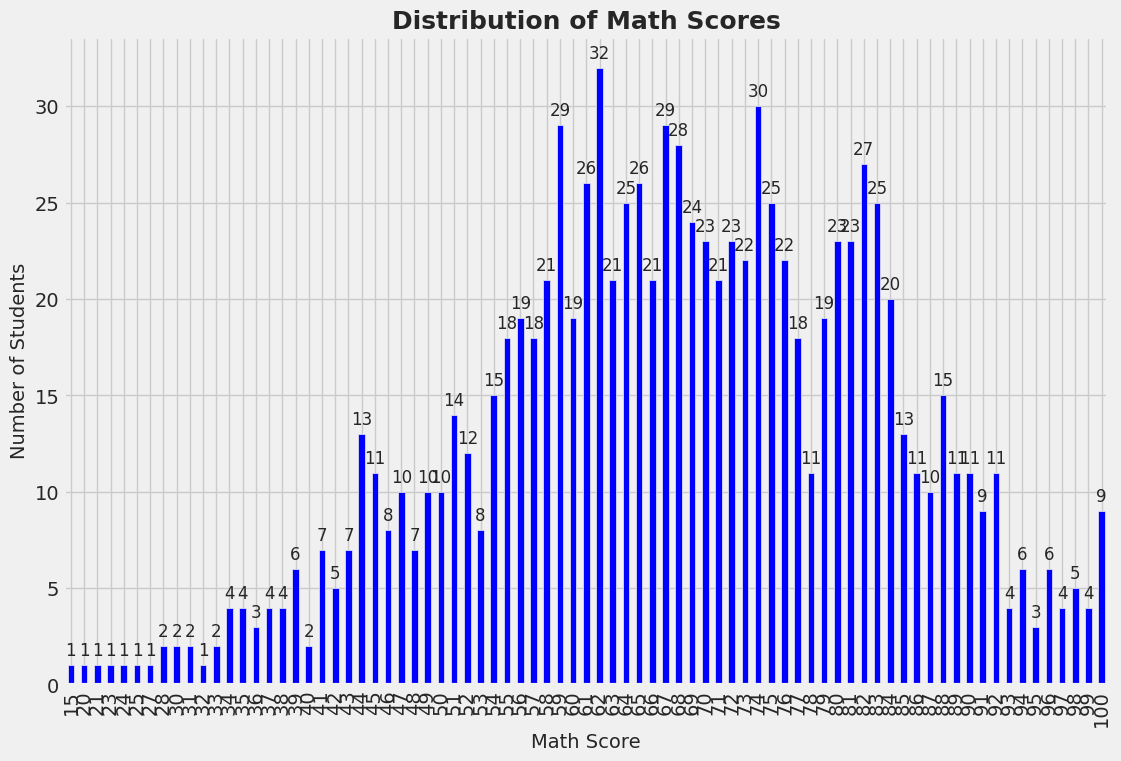

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))  # Adjusted figsize for better readability
value_counts = data['math score'].value_counts(dropna=False).sort_index()
value_counts.plot.bar(color='blue', ax=ax)
plt.title('Distribution of Math Scores', fontsize=18, fontweight='bold')
plt.xlabel('Math Score', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Adding data labels on top of the bars
for i, count in enumerate(value_counts):
    ax.text(i, count + 0.5, str(count), ha='center', fontsize=12)
ax.yaxis.grid(True)
plt.show()

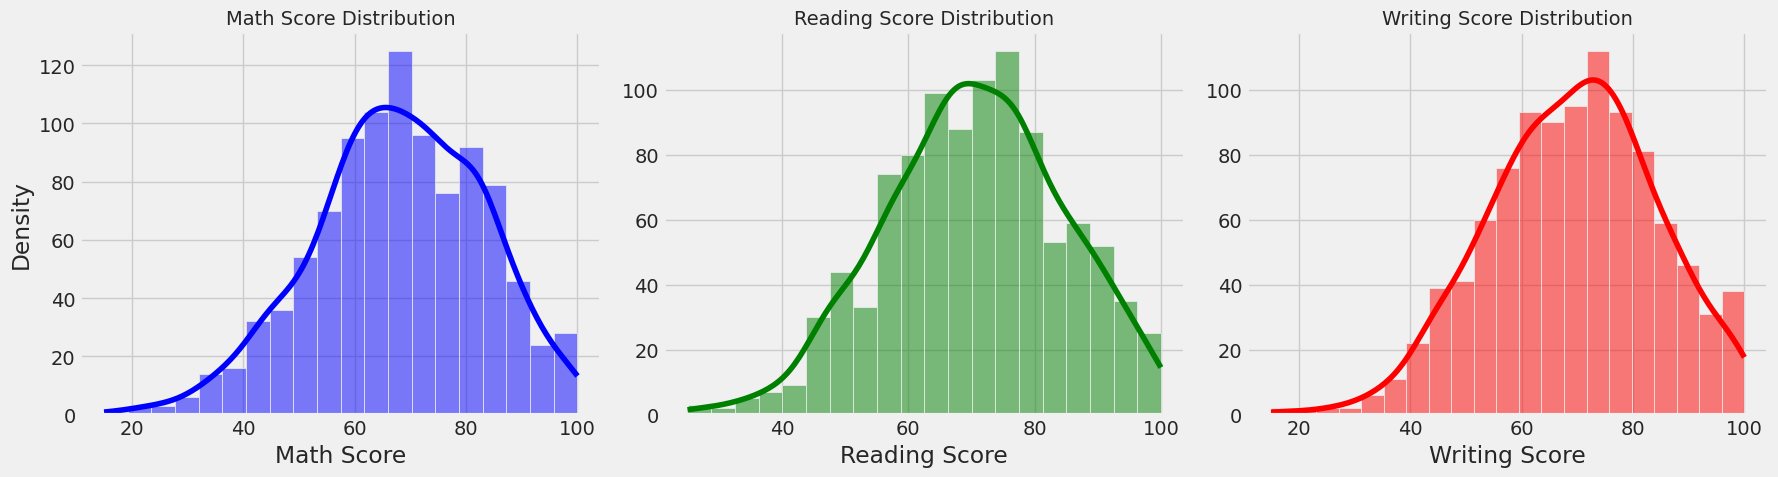

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 1)
sns.histplot(data['math score'], kde=True, color='blue')
plt.title('Math Score Distribution', fontsize=14)
plt.xlabel('Math Score')
plt.ylabel('Density')

# Reading Score Distribution
plt.subplot(1, 3, 2)
sns.histplot(data['reading score'], kde=True, color='green')
plt.title('Reading Score Distribution', fontsize=14)
plt.xlabel('Reading Score')
plt.ylabel('')

# Writing Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(data['writing score'], kde=True, color='red')
plt.title('Writing Score Distribution', fontsize=14)
plt.xlabel('Writing Score')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(6)

In [ ]:
math_score=np.random.choice(a=data['math score'],size=100) #Taking 100 sample values from dataset
math_score

array([75, 93, 48, 76, 83, 75, 49, 83, 75, 51, 64, 28, 63, 61, 66, 58, 64,
       49, 41, 45, 44, 68, 82, 52, 62, 76, 87, 68, 74, 74, 88, 70, 87, 72,
       56, 76, 41, 53, 69, 44, 76, 69, 71, 60, 47, 83, 61, 57, 75, 67, 99,
       45, 66, 89, 74, 58, 48, 92, 84, 72, 45, 68, 73, 81, 55, 47, 83, 67,
       70, 43, 51, 59, 85, 48, 55, 61, 80, 59, 86, 64, 56, 81, 63, 79, 93,
       80, 71, 56, 68, 82, 53, 70, 83, 76, 75, 83, 43, 57, 59, 59])

This is sample mean

In [ ]:
math_score.mean()

66.5

Below describe population mean

In [ ]:
data['math score'].mean()

67.81

In [ ]:
reading_score=np.random.choice(a=data['reading score'],size=100)
reading_score

array([50, 65, 41, 61, 69, 57, 78, 93, 69, 61, 78, 50, 65, 89, 82, 72, 77,
       70, 61, 74, 71, 82, 74, 56, 70, 37, 56, 89, 75, 87, 72, 71, 53, 60,
       62, 53, 63, 85, 68, 63, 88, 59, 58, 76, 62, 93, 90, 73, 59, 68, 51,
       87, 49, 62, 68, 52, 62, 66, 77, 76, 61, 85, 59, 74, 68, 91, 77, 86,
       74, 68, 79, 93, 74, 81, 69, 45, 56, 73, 58, 38, 68, 79, 65, 68, 70,
       87, 70, 65, 79, 59, 77, 65, 45, 53, 84, 72, 82, 68, 94, 65])

In [ ]:
reading_score.mean()

69.09

In [ ]:
data['reading score'].mean()

70.382

In [ ]:
writing_score=np.random.choice(a=data['writing score'],size=100)
writing_score

array([51, 76, 60, 54, 93, 60, 79, 64, 74, 96, 72, 65, 66, 60, 65, 45, 60,
       63, 75, 64, 84, 64, 88, 62, 60, 84, 90, 63, 66, 60, 85, 78, 46, 58,
       84, 57, 71, 44, 66, 74, 89, 84, 55, 71, 58, 44, 73, 68, 72, 77, 63,
       47, 56, 57, 55, 47, 96, 72, 62, 23, 67, 55, 75, 57, 77, 92, 65, 66,
       63, 63, 65, 62, 96, 83, 61, 62, 62, 69, 58, 81, 80, 71, 51, 93, 61,
       62, 56, 82, 68, 77, 80, 71, 36, 66, 87, 77, 56, 88, 72, 69])

In [ ]:
writing_score.mean()

67.77

In [ ]:
data['writing score'].mean()

69.14

In [ ]:
import scipy.stats as sc
import math

In [ ]:
np.random.seed(10)

In [ ]:
sample_size=1000
sample=np.random.choice(a=data['math score'],size=sample_size)
sample

array([ 51,  83,  80,  87,  62,  97,  55,  91,  65,  62,  86,  73,  63,
        80,  41,  46,  63,  46,  59,  76,  60,  72,  84,  63,  66,  69,
        95,  94,  64,  74,  93,  75,  92,  80,  83,  64,  69,  55,  63,
        70,  73,  69,  72,  89,  79,  56,  61,  83,  64,  78,  48,  76,
        67,  71,  55,  60,  80,  55,  65,  94,  81,  64,  66,  93,  61,
        58,  68,  56,  60,  61,  72,  64,  95,  66,  87,  79,  81,  83,
        86,  81,  33,  34,  58,  98,  52,  64,  83,  64,  95,  89,  72,
        58,  84,  49,  71,  82,  54,  89,  33,  66,  52,  67,  62,  80,
        42,  62,  90,  82,  21,  71,  59,  93,  70,  58,  83,  79,  59,
        80,  90,  77,  72,  60,  72,  65,  93,  75,  75,  94,  58,  86,
        81,  72,  71,  45,  62,  65,  74,  65,  67,  67,  74,  69, 100,
        65,  59,  73,  67,  90,  54,  82,  61,  76,  72,  42,  97,  77,
        52,  43,  61,  69,  90,  67,  62,  44,  74,  79,  84,  88,  67,
        59,  57,  73,  57,  91,  89,  68,  51,  71,  37,  61,  3

In [ ]:
sample_mean=sample.mean()
sample_mean

68.006

In [ ]:
z_critical=sc.norm.ppf(q=0.95)
z_critical

1.6448536269514722

In [ ]:
population_std_deviation=data['math score'].std()
population_std_deviation

15.250195686235259

In [ ]:
margin_of_error=z_critical*(population_std_deviation/math.sqrt(sample_size))
margin_of_error

0.793236470098205

Confidence Interval represent a probability that a parameter will fall between a pair of values around the mean

In [ ]:
confidence_interval=(sample_mean - margin_of_error, sample_mean + margin_of_error)
confidence_interval

(67.21276352990179, 68.79923647009821)

In [ ]:
true_mean=format(data['math score'].mean())
true_mean

'67.81'

In [ ]:
print(z_critical)
print(confidence_interval)
print(true_mean)

1.6448536269514722
(67.21276352990179, 68.79923647009821)
67.81


#So we will repeat above process for reading and writing score for finding 'z_critical' and 'confidence interval'.

In [ ]:
np.random.seed(10)

In [ ]:
sample_size_1=1000
sample_1=np.random.choice(a=data['reading score'],size=sample_size_1)
sample_1

array([ 68,  90,  66,  90,  71,  96,  60,  99,  64,  70,  89,  87,  69,
        75,  58,  57,  57,  46,  55,  65,  57,  76,  88,  56,  71,  67,
        86,  86,  67,  66,  86,  97,  80,  93,  86,  62,  67,  61,  64,
        73,  76,  81,  85,  95,  77,  53,  64,  90,  62,  80,  59,  75,
        63,  63,  68,  80,  75,  61,  73,  84,  77,  81,  71,  87,  49,
        66,  64,  46,  80,  70,  71,  82,  86,  71,  87,  97,  65,  83,
        72,  71,  47,  37,  67,  96,  56,  72,  85,  82,  86,  93,  73,
        57,  85,  53,  68,  86,  77,  93,  42,  70,  64,  74,  65,  84,
        50,  67,  93,  95,  30,  83,  55,  98,  49,  57,  88,  65,  69,
        79,  96,  80,  73,  74,  62,  64,  78,  66,  69,  97,  56,  89,
        93,  69,  87,  61,  67,  65,  83,  61,  77,  67,  63,  72, 100,
        83,  60,  68,  67,  76,  57,  69,  70,  82,  67,  61,  94,  73,
        59,  48,  56,  75,  78,  73,  61,  69,  75,  89,  77,  89,  63,
        68,  54,  91,  58,  96,  78,  79,  46,  83,  51,  63,  4

In [ ]:
sample_1_mean=sample_1.mean()
sample_1_mean

70.437

In [ ]:
population_std_deviation_read=data['reading score'].std()
population_std_deviation_read

14.107412771131887

In [ ]:
margin_of_error_read=z_critical*(population_std_deviation_read/math.sqrt(sample_size_1))
margin_of_error_read

0.73379480099993

In [ ]:
confidence_interval_for_read=(sample_1_mean - margin_of_error, sample_1_mean + margin_of_error)
confidence_interval_for_read

(69.64376352990179, 71.2302364700982)

In [ ]:
true_mean_read=format(data['reading score'].mean())
true_mean_read

'70.382'

In [ ]:
print(z_critical)
print(confidence_interval_for_read)
print(true_mean_read)

1.6448536269514722
(69.64376352990179, 71.2302364700982)
70.382


In [ ]:
sample_size_2=1000
sample_2=np.random.choice(a=data['writing score'],size=sample_size_2)
sample_2

array([ 83,  55,  66,  82,  87,  64,  76,  30,  72,  76,  46,  85,  68,
        76,  87,  56,  93,  72,  77,  93,  72,  83,  76,  70,  45,  80,
        68,  63,  79,  55,  89,  68,  87,  56,  72,  45,  47,  65,  63,
        49,  55,  78,  79,  66,  73,  71,  59,  64,  78,  76,  70,  32,
        93,  72,  46,  51,  72,  85,  37,  85,  52,  82,  89,  87,  69,
        63,  66,  77, 100,  96,  44,  77,  77,  51,  81,  51,  77,  94,
        76,  54,  78,  69,  57,  81,  75,  54,  47,  57,  66, 100,  44,
        86,  80,  36,  86,  69,  80,  86,  71,  81,  73,  68,  78,  68,
        99,  70,  89,  53,  62,  71,  52,  68,  94, 100, 100,  59,  84,
        81,  81,  89,  77,  70,  76,  89,  55,  54,  60,  36,  63,  38,
        64,  58,  44,  96, 100,  86,  65,  66,  76,  59,  54,  71,  93,
        74,  72,  52,  74,  77,  71,  65,  83,  59,  74,  86,  78,  57,
        56,  93,  64,  80,  70,  61,  78,  84,  56,  54,  69,  72,  82,
        70, 100,  89,  76,  76,  84,  51,  58,  62,  78,  72,  6

In [ ]:
sample_2_mean=sample_2.mean()
sample_2_mean

69.116

In [ ]:
population_std_deviation_wrt=data['writing score'].std()
population_std_deviation_wrt

15.025916883111599

In [ ]:
margin_of_error_wrt=z_critical*(population_std_deviation_wrt/math.sqrt(sample_size_2))
margin_of_error_wrt

0.7815706443102618

In [ ]:
confidence_interval_for_wrt=(sample_2_mean - margin_of_error_wrt, sample_2_mean + margin_of_error_wrt)
confidence_interval_for_wrt

(68.33442935568974, 69.89757064431026)

In [ ]:
true_mean_wrt=format(data['writing score'].mean())
true_mean_wrt

'69.14'

In [ ]:
print(z_critical)
print(confidence_interval_for_wrt)
print(true_mean_wrt)

1.6448536269514722
(68.33442935568974, 69.89757064431026)
69.14


#Lets Visualize how many students are passed in maths as minimum passing marks is ''33''.

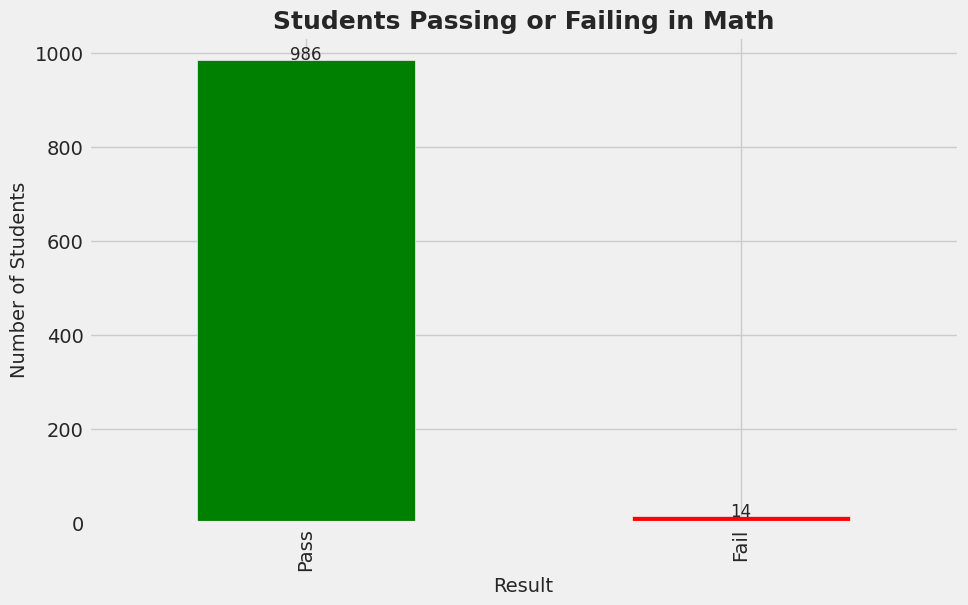

In [ ]:
passing_marks = 33
data['pass math'] = np.where(data['math score'] < passing_marks, "Fail", "Pass")
fig, ax = plt.subplots(figsize=(10, 6))

pass_fail_counts = data['pass math'].value_counts(dropna=False)
pass_fail_counts.plot.bar(color=['green', 'red'], ax=ax)
plt.title('Students Passing or Failing in Math', fontsize=18, fontweight='bold')
plt.xlabel('Result', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
for i, count in enumerate(pass_fail_counts):
    ax.text(i, count + 0.5, str(count), ha='center', fontsize=12)

ax.yaxis.grid(True)

plt.show()

For Reading Score


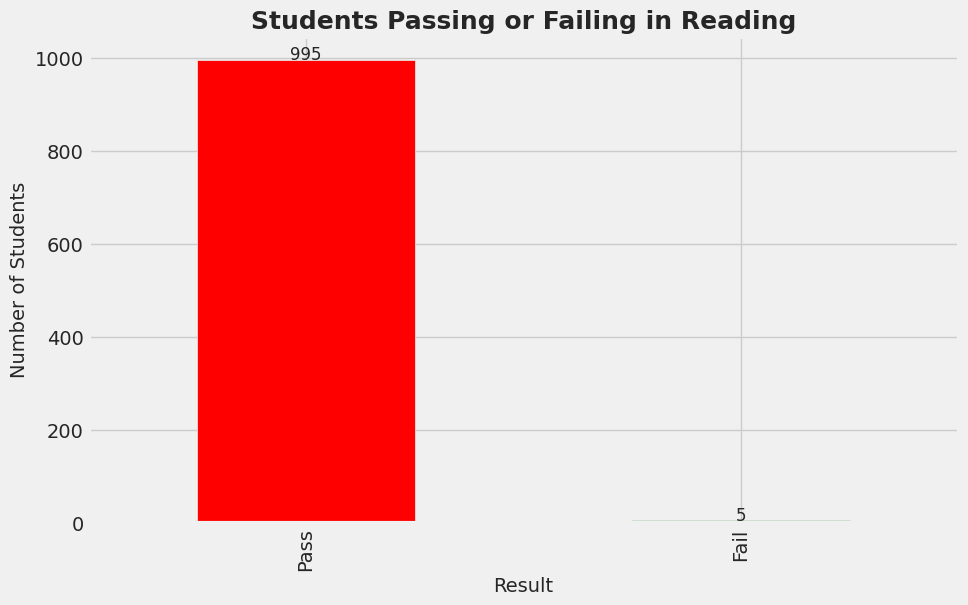

In [ ]:
passing_marks = 33
data['pass reading'] = np.where(data['reading score'] < passing_marks, "Fail", "Pass")

fig, ax = plt.subplots(figsize=(10, 6))

pass_fail_counts = data['pass reading'].value_counts(dropna=False)
pass_fail_counts.plot.bar(color=['red', 'green'], ax=ax)

plt.title('Students Passing or Failing in Reading', fontsize=18, fontweight='bold')
plt.xlabel('Result', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
for i, count in enumerate(pass_fail_counts):
    ax.text(i, count + 0.5, str(count), ha='center', fontsize=12)
ax.yaxis.grid(True)
plt.show()

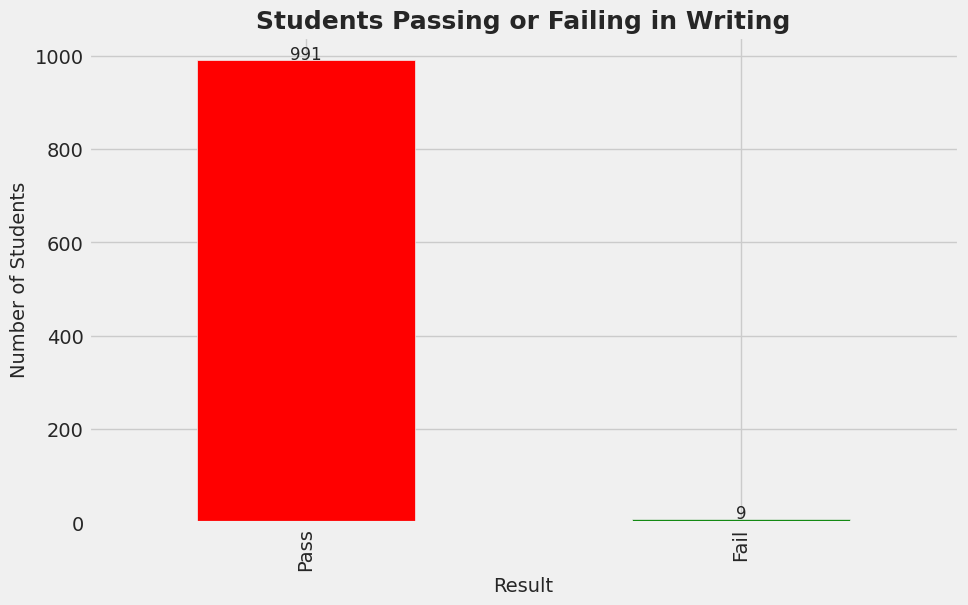

In [ ]:
passing_marks = 33
data['pass writing'] = np.where(data['writing score'] < passing_marks, "Fail", "Pass")

fig, ax = plt.subplots(figsize=(10, 6))

pass_fail_counts = data['pass writing'].value_counts(dropna=False)
pass_fail_counts.plot.bar(color=['red', 'green'], ax=ax)

plt.title('Students Passing or Failing in Writing', fontsize=18, fontweight='bold')
plt.xlabel('Result', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
for i, count in enumerate(pass_fail_counts):
    ax.text(i, count + 0.5, str(count), ha='center', fontsize=12)

ax.yaxis.grid(True)
plt.show()

Text(0.5, 1.0, 'Total Marks Scored by Students in Maths')

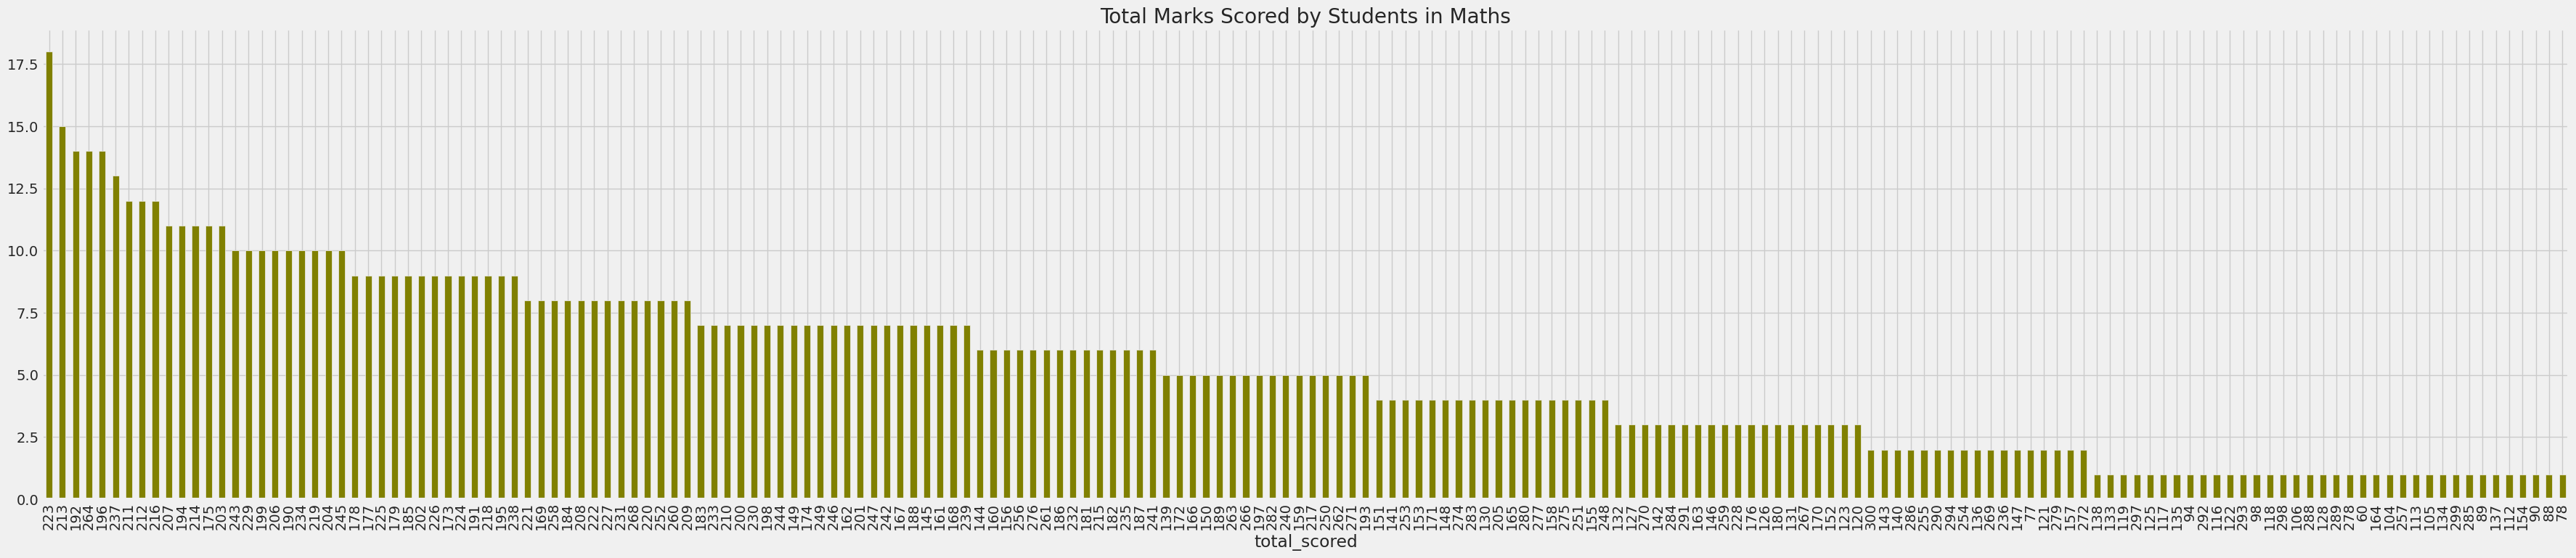

In [ ]:
plt.subplots(figsize=(15,5))
data['total_scored']=data['math score']+data['reading score']+data['writing score']
data['total_scored'].value_counts(normalize=True)
data['total_scored'].value_counts(dropna=True).plot.bar(color='olive',figsize=(40,8))
plt.title('Total Marks Scored by Students in Maths')

<ipython-input-74-c97c3dd54475>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['percentage'][i]=ceil(data['percentage'][i])
<ipython-input-74-c97c3dd54475>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['percentage'][i]=ceil(data['percentage'][i])
<ipython-input-74-c97c3dd54475>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['percentage'][i]=ceil(data['percentage'][i])
<ipython-input-74-c97c3dd54475>:4: SettingWith

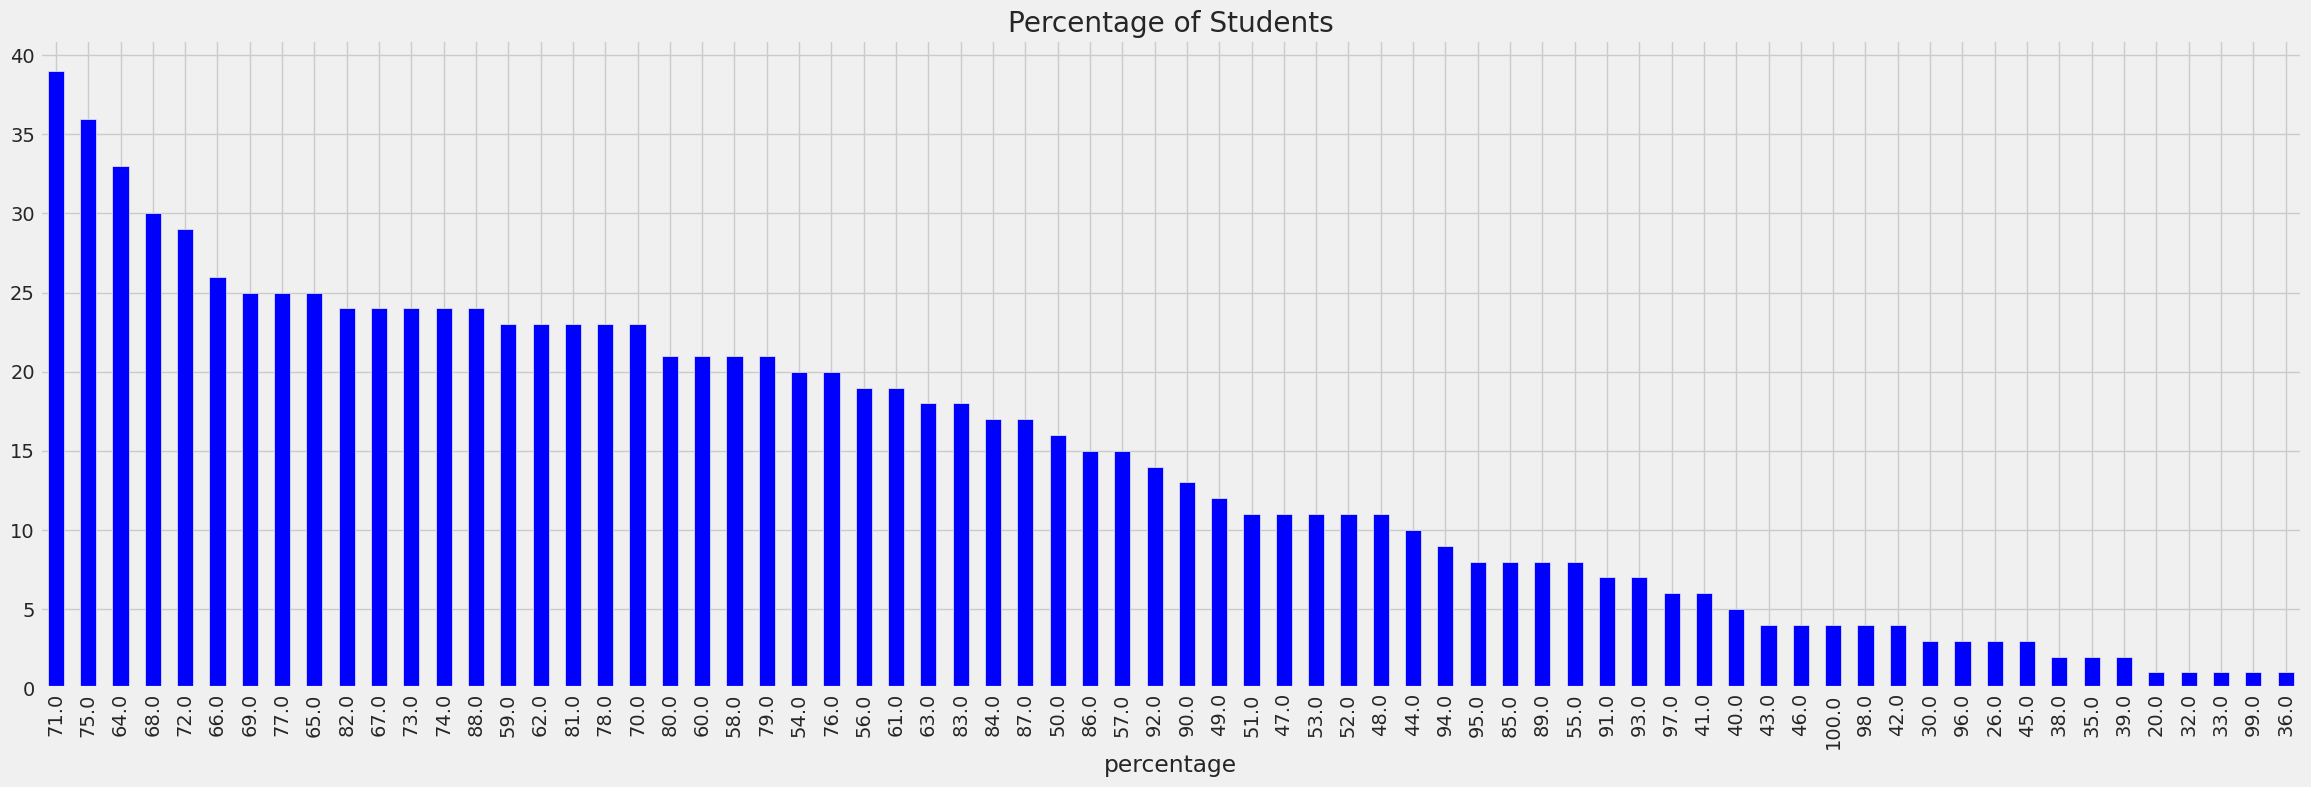

In [ ]:
from math import*
data['percentage']=(data['total_scored']/3)
for i in range(0,1000):
  data['percentage'][i]=ceil(data['percentage'][i])
data['percentage'].value_counts(normalize=True)
data['percentage'].value_counts(dropna=False).plot.bar(figsize=(26,8),color='blue')
plt.title('Percentage of Students')
plt.show()

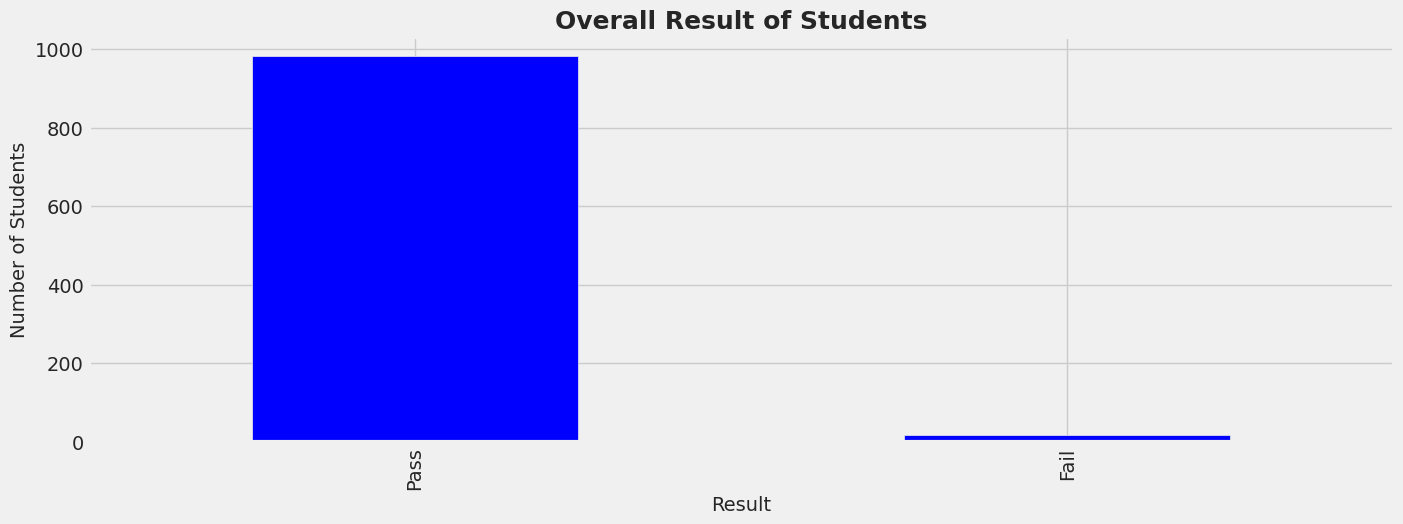

In [ ]:
data['result'] = data.apply(lambda x: 'Fail' if x['pass math'] == 'Fail' or x['pass reading'] == 'Fail' or x['pass writing'] == 'Fail' else 'Pass', axis=1)

plt.figure(figsize=(15, 5))
result_counts = data['result'].value_counts(dropna=False)
result_counts.plot.bar(color='blue')
plt.title('Overall Result of Students', fontsize=18, fontweight='bold')
plt.xlabel('Result', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.show()